# **Working with Sarcasm Dataset (From Kaggle)**

### **Let's load the dataset from my Gdrive (pre-downloaded from Kaggle)**

In [ ]:
# Run this to ensure TensorFlow 2.x is used
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [ ]:
!pip install wget

import wget
url = "https://drive.google.com/uc?export=download&id=16GRvp_EI2ELxNeyQ7eNgTutrURs5XL7s"
wget.download(url, "/tmp/sarcasm.json")

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=cb9f9c776e168c651cf9a5a97daed85474d78d08ee019e2efc47847ae90ecb14
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


'/tmp/sarcasm.json'

### **Modifying the data**

In [ ]:
import json
whole_data = [json.loads(line) for line in open("/tmp/sarcasm.json", 'r')]
whole_data[0:2]

[{'article_link': 'https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5',
  'headline': "former versace store clerk sues over secret 'black code' for minority shoppers",
  'is_sarcastic': 0},
 {'article_link': 'https://www.huffingtonpost.com/entry/roseanne-revival-review_us_5ab3a497e4b054d118e04365',
  'headline': "the 'roseanne' revival catches up to our thorny political mood, for better and worse",
  'is_sarcastic': 0}]

### **Doing basic analysis like tokenizing, padding etc.**

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

link = []
head = []
sarcastic = []

for key in whole_data:
  link.append(key["article_link"])
  head.append(key["headline"])
  sarcastic.append(key["is_sarcastic"])


## **Let's Build the Model**


In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from IPython.display import display
from IPython.html import widgets 
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual



def My_model(vocab_size, embedding_dim, max_length):

  # vocab_size = 10000
  # embedding_dim = 16
  # max_length = 100
  trunc_type='post'
  padding_type='post'
  oov_tok = "<OOV>"
  training_size = 20000
  num_epochs = 30

  training_sentences = head[0:training_size]
  testing_sentences = head[training_size:]
  training_labels = sarcastic[0:training_size]
  testing_labels = sarcastic[training_size:]

  token = Tokenizer(num_words = vocab_size, oov_token = oov_tok)
  token.fit_on_texts(training_sentences)
  word_idx = token.word_index
  train_sequences = token.texts_to_sequences(training_sentences)
  train_padded = pad_sequences(train_sequences, maxlen = max_length, padding = padding_type, truncating = trunc_type)
  test_sequences = token.texts_to_sequences(testing_sentences)
  test_padded = pad_sequences(test_sequences, maxlen = max_length, padding = padding_type, truncating = trunc_type)

  training_padded = np.array(train_padded)
  training_label = np.array(training_labels)
  testing_padded = np.array(test_padded)
  testing_label = np.array(testing_labels)

  model = tf.keras.Sequential([
             tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
             tf.keras.layers.GlobalAveragePooling1D(),
             tf.keras.layers.Dense(128, activation = "relu"),
             tf.keras.layers.Dropout(0.2),
             tf.keras.layers.Dense(1, activation = "sigmoid")                                   
  ])


  model.compile(optimizer = Adam(beta_1=0.9, beta_2=0.999, epsilon=1e-08), 
              loss = "binary_crossentropy", 
              metrics = ["accuracy"])
  
  model.summary()

  early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=10, verbose = 1, restore_best_weights=True)
  
  reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_accuracy', factor=0.5, patience=6, verbose = 1,
    min_delta=0.01, min_lr=0.001)

  history = model.fit(training_padded, training_label, epochs = num_epochs, validation_data = (testing_padded, testing_label), callbacks = [early_stop, reduce_lr], verbose = 1)

  def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
  
  plot_graphs(history, "accuracy")
  plot_graphs(history, "loss")

# interact(My_model, vocab_size=(1000, 10000, 2000), embedding_dim=(16, 40, 8), max_length=(16, 40, 8))

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, 100, 32)           320000    
_________________________________________________________________
global_average_pooling1d_6 ( (None, 32)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               4224      
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 129       
Total params: 324,353
Trainable params: 324,353
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
625/625 [==============================] - 3s 5ms/step - loss: 0.6005 - accuracy: 0.6587 - val_loss: 0.

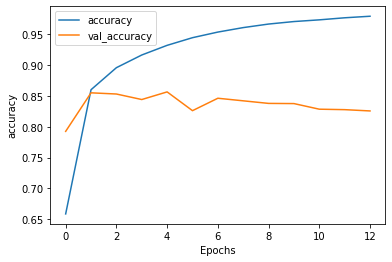

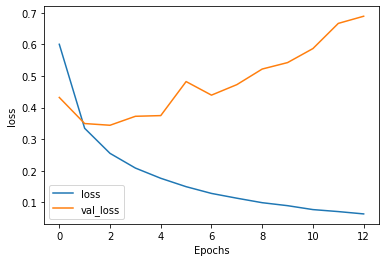

In [ ]:
# Here using ---> [vocab_size = 10000 ,embedding_dim = 32, max_length = 100]

My_model(10000, 32, 100)

### **Let's change the model a bit and see**

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 60, 32)            160000    
_________________________________________________________________
global_average_pooling1d_7 ( (None, 32)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               4224      
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 129       
Total params: 164,353
Trainable params: 164,353
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
625/625 [==============================] - 3s 5ms/step - loss: 0.5511 - accuracy: 0.6946 - val_loss: 0.

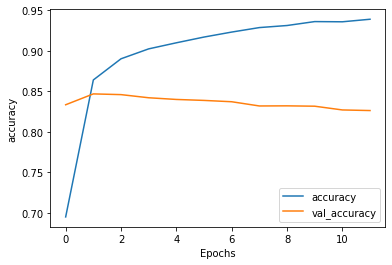

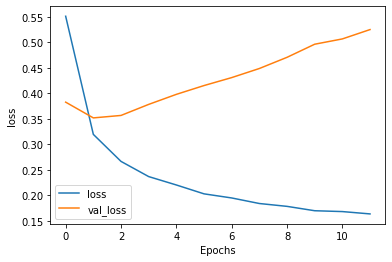

In [ ]:
# Here using ---> [vocab_size = 5000 ,embedding_dim = 32, max_length = 60]

My_model(5000, 32, 60)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, 40, 24)            48000     
_________________________________________________________________
global_average_pooling1d_8 ( (None, 24)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)               3200      
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 1)                 129       
Total params: 51,329
Trainable params: 51,329
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
625/625 [==============================] - 2s 3ms/step - loss: 0.5341 - accuracy: 0.7161 - val_loss: 0.39

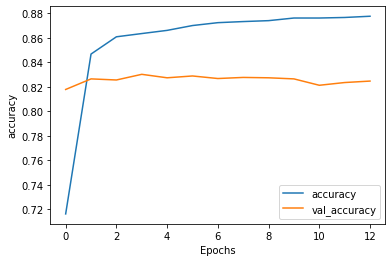

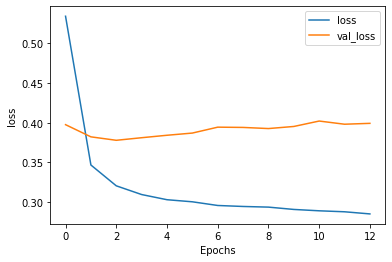

In [ ]:
# Here using ---> [vocab_size = 2000 ,embedding_dim = 24, max_length = 40]

My_model(2000, 24, 40)

### **N.B. - As I can see, that for above all 3 settings the cross-val accuracy is very close to each other, Now I'll see using LSTM, GRU, CNN etc**

# **Let's use LSTM and CNN and recreate the model**

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
# from IPython.display import display
# from IPython.html import widgets 
# from IPython.display import display
# from ipywidgets import interact, interactive, fixed, interact_manual



def My_model(vocab_size, embedding_dim, max_length):

  # vocab_size = 10000
  # embedding_dim = 16
  # max_length = 100
  trunc_type='post'
  padding_type='post'
  oov_tok = "<OOV>"
  training_size = 20000
  num_epochs = 30

  training_sentences = head[0:training_size]
  testing_sentences = head[training_size:]
  training_labels = sarcastic[0:training_size]
  testing_labels = sarcastic[training_size:]

  token = Tokenizer(num_words = vocab_size, oov_token = oov_tok)
  token.fit_on_texts(training_sentences)
  word_idx = token.word_index
  train_sequences = token.texts_to_sequences(training_sentences)
  train_padded = pad_sequences(train_sequences, maxlen = max_length, padding = padding_type, truncating = trunc_type)
  test_sequences = token.texts_to_sequences(testing_sentences)
  test_padded = pad_sequences(test_sequences, maxlen = max_length, padding = padding_type, truncating = trunc_type)

  training_padded = np.array(train_padded)
  training_label = np.array(training_labels)
  testing_padded = np.array(test_padded)
  testing_label = np.array(testing_labels)

  model = tf.keras.Sequential([
             tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length = max_length),
             tf.keras.layers.Conv1D(128, 5, activation='relu'),
             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(8, return_sequences=True)),
             tf.keras.layers.GlobalAveragePooling1D(),
             tf.keras.layers.Dense(64, activation = "relu"),
             tf.keras.layers.Dropout(0.2),
             tf.keras.layers.Dense(1, activation = "sigmoid")                                   
  ])


  model.compile(optimizer = Adam(beta_1=0.9, beta_2=0.999, epsilon=1e-08), 
              loss = "binary_crossentropy", 
              metrics = ["accuracy"])
  
  model.summary()

  
  early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=10, verbose = 1, restore_best_weights=True)
  
  reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_accuracy', factor=0.5, patience=10, verbose = 1,
    min_delta=0.01, min_lr=0.001)

  history = model.fit(training_padded, training_label, epochs = num_epochs, validation_data = (testing_padded, testing_label), callbacks = [early_stop, reduce_lr], verbose = 1)

  

  # history = model.fit(training_padded, training_label, epochs = num_epochs, validation_data = (testing_padded, testing_label), verbose = 1)

  def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
  
  plot_graphs(history, "accuracy")
  plot_graphs(history, "loss")

# interact(My_model, vocab_size=(1000, 10000, 2000), embedding_dim=(16, 40, 8), max_length=(16, 40, 8))

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, 40, 24)            48000     
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 36, 128)           15488     
_________________________________________________________________
bidirectional_4 (Bidirection (None, 36, 64)            41216     
_________________________________________________________________
bidirectional_5 (Bidirection (None, 36, 16)            4672      
_________________________________________________________________
global_average_pooling1d_5 ( (None, 16)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)                1088      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)               

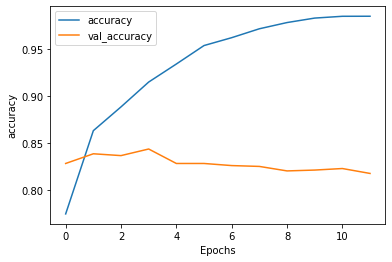

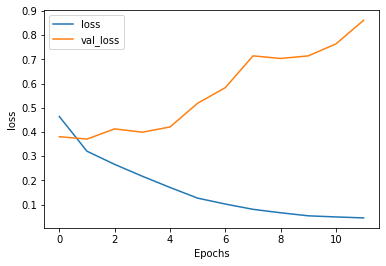

In [ ]:
My_model(2000, 24, 40)